In [2]:
# if you have google drive permission then use this 

from google.colab import drive

drive.mount('/content/gdrive')
# !ln -s   /gdrive/MyDrive/colab/Credit_Card/data/ /content/data

Mounted at /content/gdrive


In [3]:
import os
os.chdir('./gdrive/MyDrive/CreditCard')


/content/gdrive/MyDrive/CreditCard


['train_1.csv',
 'test_1.csv',
 'n_estimator.png',
 'max_features.png',
 'max_depth.png',
 'train.csv',
 'test.csv',
 'test_y.csv',
 'train_y.csv',
 'result.gdoc',
 '未命名文件.gdoc',
 'stscd.png',
 'normal_stscd.png']

In [4]:
!pip3  install -U mlxtend

import pandas as pd
import matplotlib.pyplot as plt


     |████████████████████████████████| 1.4MB 5.1MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [5]:
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score , average_precision_score 
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve ,auc , log_loss ,  classification_report 

In [6]:
df_X = pd.read_csv("./train_1.csv")
df_X = df_X.set_index("txkey")

In [7]:
df_y = pd.read_csv("./train_y.csv")
df_y = df_y.set_index("txkey")

In [8]:
df_X.head(3)


,acqic,bacno,cano,conam,loctm,mcc,mchno,scity,contp_0,contp_1,contp_2,contp_3,contp_4,contp_5,contp_6,csmcu_0,csmcu_1,csmcu_2,csmcu_3,csmcu_4,csmcu_5,csmcu_6,csmcu_7,csmcu_9,csmcu_10,csmcu_11,csmcu_12,csmcu_13,csmcu_14,csmcu_15,csmcu_16,csmcu_17,csmcu_18,csmcu_19,csmcu_20,csmcu_21,csmcu_22,csmcu_23,csmcu_24,csmcu_25,...,stocn_79,stocn_80,stocn_81,stocn_82,stocn_83,stocn_84,stocn_85,stocn_86,stocn_87,stocn_88,stocn_89,stocn_90,stocn_91,stocn_92,stocn_93,stocn_94,stocn_95,stocn_96,stocn_97,stocn_98,stocn_99,stocn_100,stocn_101,stocn_102,stocn_104,stocn_105,stocn_106,stocn_107,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
txkey,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
516056,0.581061,0.658131,-1.163791,-0.349849,0.505301,2.041755,0.111695,-2.401805,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
483434,0.581061,-1.407913,1.303879,-0.349849,0.117856,2.041755,0.111695,-2.401805,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1407164,0.471238,1.584983,-1.296311,0.897173,0.510941,-0.651666,-0.176953,-0.744579,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
df_y.shape

(1141340, 1)

In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [11]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_val = train_test_split(df_X, test_size=0.25, random_state=42)


In [12]:
df_y_train = df_y.loc[df_X_train.index]
df_y_val = df_y.loc[df_X_val.index]


In [13]:
X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()
# clf = RandomForestClassifier(n_estimators=400 ,max_depth=50, random_state=0)
# clf.fit(X_train, y_train)
# lgb_eval = lgb.Dataset(df_X_val, df_y_val, reference=lgb_train)

# Validation with downsampleing data

In [ ]:
print('Starting predicting...')
# predict
# y_pred = gbm.predict(df_X_val, num_iteration=gbm.best_iteration)
y_pred = clf.predict(df_X_val)
# eval
print('auc:', roc_auc_score(df_y_val, y_pred))

In [ ]:
confusion_matrix(df_y_val, (y_pred > 0.5).astype(int))

array([[281320,    219],
       [  2368,   1428]])

In [ ]:
tn, fp, fn, tp  = confusion_matrix(df_y_val, (y_pred > 0.5).astype(int)).ravel() 

In [ ]:
tn, fp, fn, tp

(281320, 219, 2368, 1428)

# Testing : verify with real distribution data

In [15]:
X_test = pd.read_csv("./test_1.csv")
X_test = X_test.set_index("txkey")
y_test = pd.read_csv("./test_y.csv")

In [16]:
y_test.shape
y_test = y_test.set_index("txkey")


In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was pas

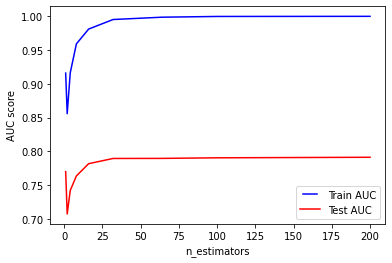

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


In [ ]:
max_depths = np.linspace(1, 100, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was pas

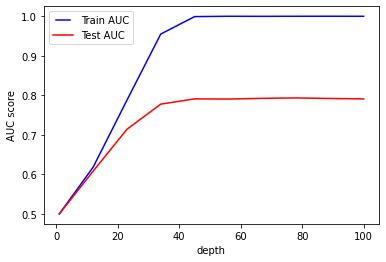

In [ ]:
# train_results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('depth')
plt.show()


In [ ]:
max_features = [10, 50, 100, 150, 200]
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was pas

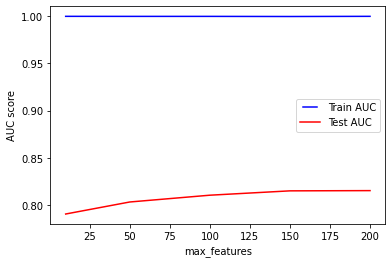

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()


In [17]:
clf = RandomForestClassifier(n_estimators=30, max_depth=40, max_features=150)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features=150,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
y_pred = clf.predict(X_test)


In [19]:
cm = confusion_matrix(y_test, (y_pred > 0.5).astype(int), labels=[0,1])
cm

array([[374921,    454],
       [  1914,   3158]])

In [20]:
th = .6
print("precision_score", precision_score(y_test,(y_pred > th).astype(int)))
print("recall_score",    recall_score(y_test,(y_pred > th).astype(int)))
print("f1_score",        f1_score(y_test,(y_pred > th).astype(int)))

precision_score 0.8743078626799557
recall_score 0.6226340694006309
f1_score 0.7273146015660987


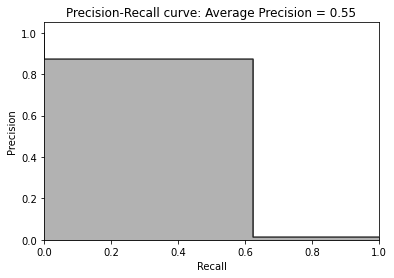

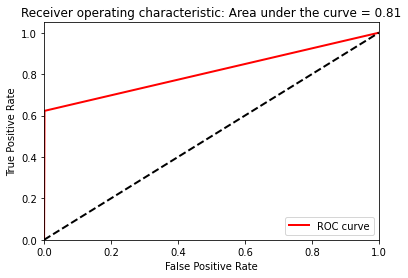

In [21]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,y_pred)
average_precision = \
    average_precision_score(y_test,y_pred)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,y_pred)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

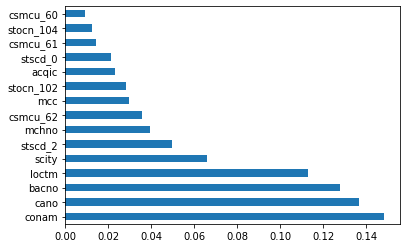

In [30]:
feat_importances = pd.Series(clf.feature_importances_, index=df_X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
fnscore =  [ (fname,socre) for fname,socre in zip(gbm.feature_name(),gbm.feature_importance())]

In [ ]:
top_feature = sorted(fnscore, key=lambda tup: tup[1], reverse=True)[:25]